In [1]:
%reset -f
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.mnistParity import MNISTParityVertical, MNISTParityHorizontal
from scripts.architecture import MLP
from scripts.train_utils import accuracy
from scripts.train import train_epoch, train_model, test_model
from scripts.plot_utils import plot_loss_accuracy

In [3]:
print(torch.__version__)

1.8.1+cu102


## Create Parity Data Iterator

### Vertical

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [ ]:
parityData2 = MNISTParityVertical(2, transforms = transforms)
parityData2.plotRandomData()

In [ ]:
trainloaderParity2 = DataLoader(parityData2.trainset, batch_size=128, shuffle=True)
testloaderParity2 = DataLoader(parityData2.testset, batch_size=128, shuffle=True)

### Neural Network Part

In [ ]:
#def myHingeLoss(y, yhat):
#    return torch.max(1-yhat*y, 0)

In [ ]:
inputShape0, inputShape1 = parityData2.trainset.data[0].shape
print(inputShape0 * inputShape1)

In [ ]:
learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
model = MLP(inputShape0,inputShape1)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.01)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, trainloaderParity2, testloaderParity2, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


In [ ]:
test_model(model, testloaderParity2, loss_fn = loss_fn)

In [ ]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [ ]:
parityData3 = MNISTParityVertical(3, transforms = transforms)

parityData3.plotRandomData()

trainloaderParity3 = DataLoader(parityData3.trainset, batch_size=128, shuffle=True)
testloaderParity3 = DataLoader(parityData3.testset, batch_size=128, shuffle=True)

In [ ]:
inputShape0, inputShape1 = parityData3.trainset.data[0].shape
print(inputShape0 * inputShape1)
model2 = MLP(inputShape0, inputShape1)
optimizer = torch.optim.Adadelta(model2.parameters(), lr=learn_rate, weight_decay = 0.01)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model2, trainloaderParity3, testloaderParity3, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)

In [ ]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### Try with Horizontal Data

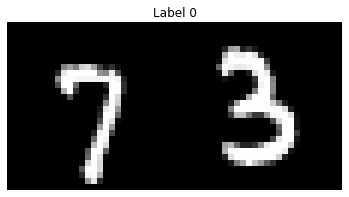

In [5]:
parityDataHor2 = MNISTParityHorizontal(2, transforms = transforms)
parityDataHor2.plotRandomData()

trainloaderParityHor2 = DataLoader(parityDataHor2.trainset, batch_size=128, shuffle=True)
testloaderParityHor2 = DataLoader(parityDataHor2.testset, batch_size=128, shuffle=True)

In [6]:
inputShape0, inputShape1 = parityDataHor2.trainset.data[0].shape
print(inputShape0 * inputShape1)

learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = torch.nn.CrossEntropyLoss()


model3 = MLP(inputShape0,inputShape1)
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.01)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model3, trainloaderParityHor2, testloaderParityHor2, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


1568
Training on cuda:0
Epoch 1 completed. Loss - total: 16944.5808 - average: 0.5648; Performance: 0.6947
TESTING - loss 2500.470333337784 - performance 0.7496
Epoch 2 completed. Loss - total: 13212.5882 - average: 0.4404; Performance: 0.7930
TESTING - loss 2342.6679623126984 - performance 0.7746
Epoch 3 completed. Loss - total: 11976.1661 - average: 0.3992; Performance: 0.8196
TESTING - loss 2803.976583957672 - performance 0.7214
Epoch 4 completed. Loss - total: 10800.0110 - average: 0.3600; Performance: 0.8444
TESTING - loss 2058.121118545532 - performance 0.8014
Epoch 5 completed. Loss - total: 9853.5440 - average: 0.3285; Performance: 0.8657
TESTING - loss 1979.8475341796875 - performance 0.8130
Epoch 6 completed. Loss - total: 9144.1504 - average: 0.3048; Performance: 0.8762
TESTING - loss 1868.6694424152374 - performance 0.8290
Epoch 7 completed. Loss - total: 8514.5281 - average: 0.2838; Performance: 0.8873
TESTING - loss 1786.7218549251556 - performance 0.8400
Epoch 8 complete

In [7]:
test_model(model3, testloaderParityHor2, loss_fn = loss_fn)

TESTING - loss 1543.2704150676727 - performance 0.8672


(1543.2704150676727, 0.8672)

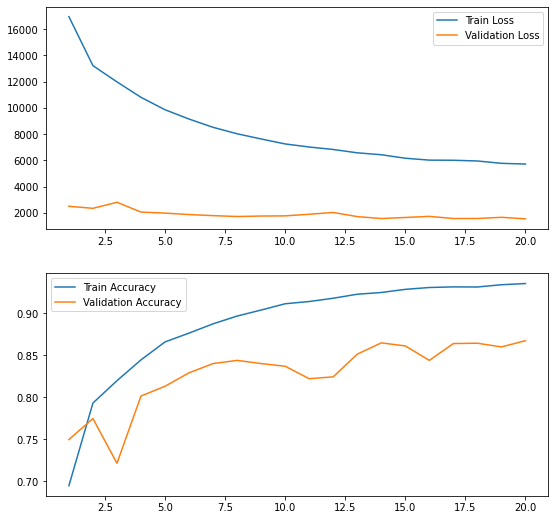

In [8]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

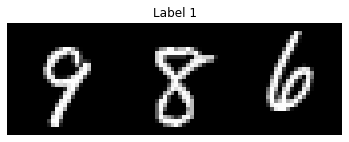

In [9]:
parityDataHor3 = MNISTParityHorizontal(3, transforms = transforms)
parityDataHor3.plotRandomData()

trainloaderParityHor3 = DataLoader(parityDataHor3.trainset, batch_size=128, shuffle=True)
testloaderParityHor3 = DataLoader(parityDataHor3.testset, batch_size=128, shuffle=True)

In [11]:
inputShape0, inputShape1 = parityDataHor3.trainset.data[0].shape
print(inputShape0 * inputShape1)

learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = loss_fn = torch.nn.CrossEntropyLoss()


model4 = MLP(inputShape0,inputShape1)
optimizer = torch.optim.Adadelta(model4.parameters(), lr=learn_rate, weight_decay = 0.01)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model4, trainloaderParityHor3, testloaderParityHor3, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


2352
Training on cuda:0
Epoch 1 completed. Loss - total: 13995.5686 - average: 0.6998; Performance: 0.5117
TESTING - loss 2340.3505977988243 - performance 0.4950
Epoch 2 completed. Loss - total: 13601.8987 - average: 0.6801; Performance: 0.5648
TESTING - loss 2358.00176769495 - performance 0.4995
Epoch 3 completed. Loss - total: 13304.7196 - average: 0.6652; Performance: 0.6020
TESTING - loss 2347.323791205883 - performance 0.5086
Epoch 4 completed. Loss - total: 12814.9528 - average: 0.6407; Performance: 0.6410
TESTING - loss 2270.430039048195 - performance 0.5536
Epoch 5 completed. Loss - total: 12176.1223 - average: 0.6088; Performance: 0.6773
TESTING - loss 2337.654790043831 - performance 0.5530
Epoch 6 completed. Loss - total: 11575.4143 - average: 0.5788; Performance: 0.6991
TESTING - loss 2111.9072360396385 - performance 0.6280
Epoch 7 completed. Loss - total: 10975.5318 - average: 0.5488; Performance: 0.7306
TESTING - loss 2167.9847838282585 - performance 0.6106
Epoch 8 complet

In [ ]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

## TODO
* Questions:
    * Paper tells that labels are 1 and -1, do we need to modify it?
    * Paper uses Hinge-loss, counterpart of this loss function is this one https://pytorch.org/docs/stable/generated/torch.nn.HingeEmbeddingLoss.html or do we need to write it?
    * Regularizaiton seems a bit different than L2, but it reminds it. Can I use weight_decay parameter in AdaDelta optimizer?